In [62]:
from molzip_adapted.molzip_simple import projection, regression
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from numpy.random import choice
from numpy import column_stack
import numpy as np
import gzip
import time

In [80]:
# Path of data directory
path_data_directory = "data_ligands/"

# Example of projection and regression in a rdkit data
We have 1128 ligands in this data and we use all of it to train and after we predict the solubility of these ligands.

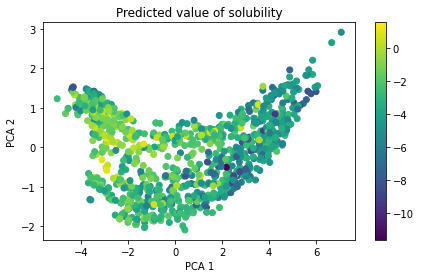

In [42]:
# prepare the data
df = pd.read_csv("molzip_adapted/solubility_dataset.csv")
smiles, sol_val = df['SMILES'], df['Solubility'].values

proj = projection(smiles)

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(7)
color = ax.scatter(proj[:, 0], proj[:, 1], c=sol_val)
fig.colorbar(color)
plt.title("Predicted value of solubility")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

/Users/wu/Documents/Fac/M2/MEET_U/molzip_adapted-main/molzip_simple.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  return np.matmul(top_k_dists, top_k_values) * (1./sum_dist)
/Users/wu/Documents/Fac/M2/MEET_U/molzip_adapted-main/molzip_simple.py:67: RuntimeWarning: invalid value encountered in double_scalars
  return np.matmul(top_k_dists, top_k_values) * (1./sum_dist)


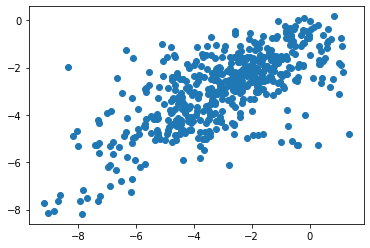

In [17]:
# prepare the data, training and validation of rdkit
df = pd.read_csv(path_data_directory+"solubility_dataset.csv")
smiles, sol_val = df['SMILES'], df['Solubility'].values
train_id = choice(range(df.shape[0]), int(df.shape[0]*0.8))
val_id = [i for i in range(df.shape[0]) if i not in train_id]
train_smiles, train_sol = smiles[train_id], sol_val[train_id]
val_smiles, val_sol = smiles[val_id], sol_val[val_id]

pred = regression(val_smiles, train_smiles, train_sol, k=10)

ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.scatter(val_sol, pred)
plt.show()


# Prediction with our data base of ligand

In [43]:
# Data of ligands from teachers
path_data_all = path_data_directory+"pilot_library.csv"
data_all = pd.read_csv(path_data_all)
smiles_test, lopg_test= data_all["smiles"], data_all["logp"]
data_all[:5]

,eos,smiles,inchi,inchikey,formula,mw,hba,hbd,tpsa,rb,fp3,logp,violates_ro5,pubchem,chembl,zinc
0,EOS1,COc1ccc(N2C(=O)NC(CC(=O)N3CCC(c4ccccc4)CC3)C2=...,InChI=1S/C23H25N3O4/c1-30-19-9-7-18(8-10-19)26...,BDSKOWUCRDTSBA-UHFFFAOYSA-N,C23H25N3O4,407.470001,7,1,78.949997,5,0.347826,2.91630,0,CID91820963,NaN,NaN
1,EOS2,COc1cc2ncn(CCC(=O)NCc3cccc(F)c3)c(=O)c2cc1OC,InChI=1S/C20H20FN3O4/c1-27-17-9-15-16(10-18(17...,BBHNGOSSYMSMBL-UHFFFAOYSA-N,C20H20FN3O4,385.394989,7,1,82.449997,7,0.250000,2.25930,0,CID39351211,NaN,ZINC000032103955
2,EOS3,O=C(C1CCCCC12OCCO2)N1CCOC(c2ccccc2)C1,InChI=1S/C19H25NO4/c21-18(16-8-4-5-9-19(16)23-...,FDNIQBQHPFKADZ-UHFFFAOYSA-N,C19H25NO4,331.411987,5,0,48.000000,2,0.631579,2.51980,0,CID118986097,NaN,NaN
3,EOS4,O=C(CCCC(=O)N1CCOC(c2ccccc2)C1)N1CCOC(c2ccccc2)C1,InChI=1S/C25H30N2O4/c28-24(26-14-16-30-22(18-2...,ACLWFALTINVVJH-UHFFFAOYSA-N,C25H30N2O4,422.524994,6,0,59.080002,6,0.440000,3.35690,0,CID118986099,NaN,NaN
4,EOS5,CC[C@@H](C)[C@@H](CO)NC(=O)Cc1c(C)c2ccc(O)cc2o...,InChI=1S/C18H23NO5/c1-4-10(2)15(9-20)19-17(22)...,WSIYPOIJJLVUDP-MEBBXXQBSA-N,C18H23NO5,333.384003,6,3,99.769997,6,0.444444,1.87272,0,CID91637070,NaN,ZINC000217689925


## Some test : to predict different parameters 
With the data from teachers, where there are lot data of different features

We want to test molzip and see if it predict well

In [75]:
# List of features that we want to predict (continuous values)
liste_features = ["mw","tpsa","fp3","logp"]
nb_data = len(data_all)
print("Number of ligands in this data :", nb_data)

Number of ligands in this data : 5016


### Regression with our list of feature

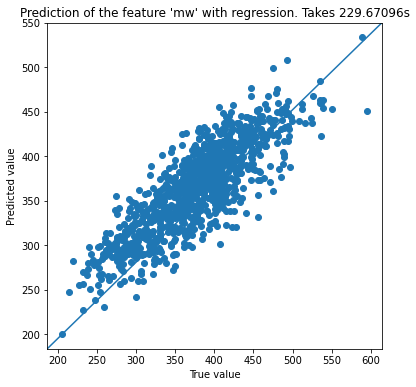

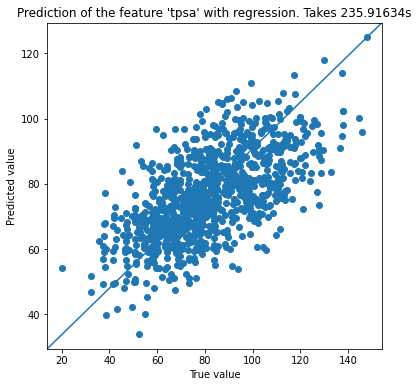

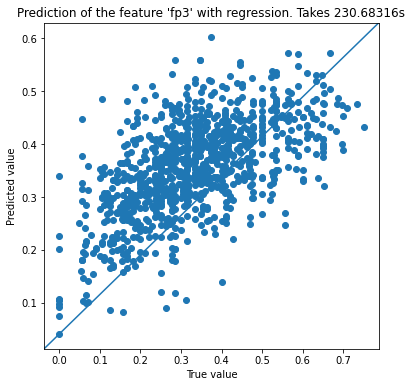

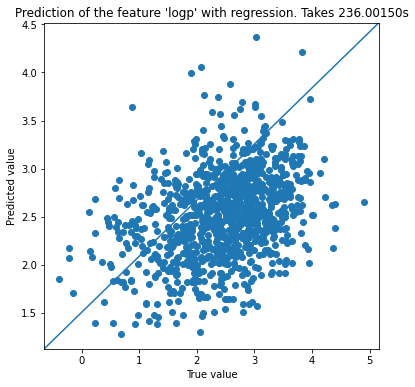

In [78]:
# Pourcent of train data 0.8
train_id = choice(range(nb_data), int(nb_data*0.8))
test_id = [i for i in range(nb_data) if i not in train_id]

# Data smiles, don't change during every regression
x_test = data_all["smiles"][test_id]
x_train = data_all["smiles"][train_id]

for feature in liste_features :
    # Take the different features
    y_test = data_all[feature][test_id]
    y_train = data_all[feature][train_id]

    # Do the regression
    start_time = time.time()
    pred = regression(x_test, x_train, y_train, k=10)
    end_time = time.time()
    T = end_time-start_time

    # Plot
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(6)
    plt.plot([0, 1], [0, 1], transform=ax.transAxes)
    plt.scatter(y_test, pred)
    plt.title("Prediction of the feature '%s' with regression. Takes %.5fs"%(feature,T))
    plt.xlabel("True value")
    plt.ylabel("Predicted value")
    plt.show()

### Make regression with different value of k = [1,10]

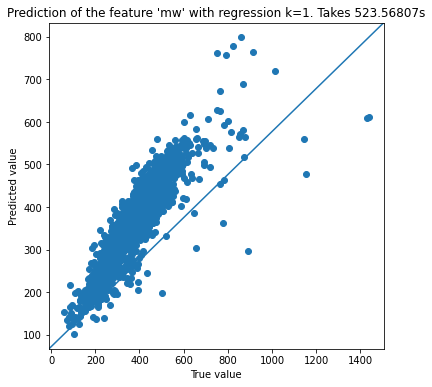

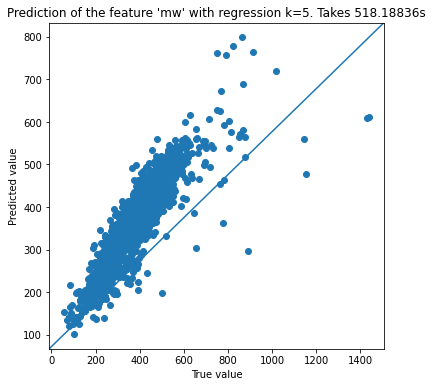

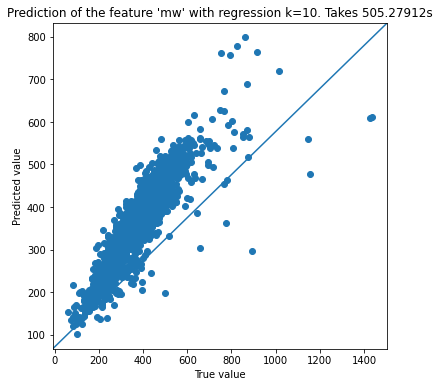

In [88]:
# Name of feature that we predict
feature = 'mw'

# Pourcent of train data 0.8
train_id = choice(range(nb_data), int(nb_data*0.8))
test_id = [i for i in range(nb_data) if i not in train_id]

# Data smiles, don't change during every regression
x_test = data_all["smiles"][test_id]
x_train = data_all["smiles"][train_id]

y_test = data_all[feature][test_id]
y_train = data_all[feature][train_id]

for diff_k in [1,5,10] :
    # Do the regression
    start_time = time.time()
    pred = regression(x_test, x_train, y_train, k=diff_k)
    end_time = time.time()
    T = end_time-start_time

    # Plot
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(6)
    plt.plot([0, 1], [0, 1], transform=ax.transAxes)
    plt.scatter(y_test, pred)
    plt.title("Prediction of the feature '%s' with regression k=%d. Takes %.5fs"%(feature,diff_k,T))
    plt.xlabel("True value")
    plt.ylabel("Predicted value")
    plt.show()

### Projection

There, we use k=10 and that we reduce with ACP to 2 components

We didn't give the features for the train

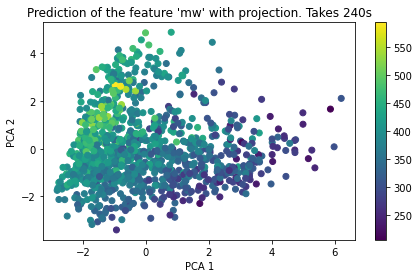

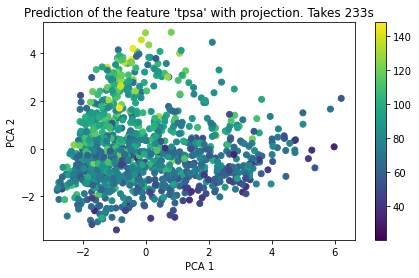

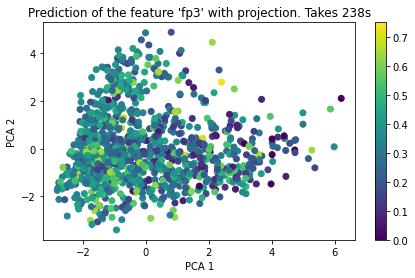

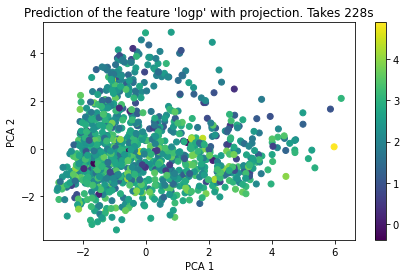

In [79]:
# Pourcent of train data 0.8
train_id = choice(range(nb_data), int(nb_data*0.8))
test_id = [i for i in range(nb_data) if i not in train_id]

# Data smiles, don't change during every regression
x_test = data_all["smiles"][test_id]
x_train = data_all["smiles"][train_id]

for feature in liste_features :
    # Take the different features
    y_test = data_all[feature][test_id]

    # Do the regression
    start_time = time.time()
    proj = projection(x_test, x_train)
    end_time = time.time()
    T = end_time-start_time

    # Plot
    fig, ax = plt.subplots()
    fig.set_figheight(4)
    fig.set_figwidth(7)
    color = ax.scatter(proj[:, 0], proj[:, 1], c=y_test)
    fig.colorbar(color)
    plt.title("Prediction of the feature '%s' with projection. Takes %.0fs"%(feature,T))
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

## Use verified ligands as train
Data of verified ligand which is verify as inhibitor of nsp13 (finding in articles)

Data of control ligand which is known as ligand of other pockets that we consider which are not possi

In [86]:
# Data of verified ligand
path_paper = path_data_directory+"ligand_papers.csv"
data_paper = pd.read_csv(path_paper,sep=';')
smiles_paper = data_paper["canonical smiles"].dropna()
nb_paper = len(smiles_paper)
print("Number of verified ligands : ",nb_paper)

# Data of control ligand 
path_control = path_data_directory+"ligand_null.csv"
data_control = pd.read_csv(path_control,sep=';')
smiles_control = data_control["canonical smiles"].dropna()
nb_control = len(smiles_control)
print("Number of control ligands : ",nb_control)

# Contain all verified and control ligands
smiles_train = pd.DataFrame(pd.concat([smiles_paper,smiles_control]),)
# Value of 1 if verified and 0 as control
lig_train = [1]*nb_paper + [0]*nb_control

smiles_train

Number of verified ligands :  29
Number of control ligands :  20


,canonical smiles
0,C=CCN1C(=NNC1=S)CSC2=CC=CC=C2[N+](=O)[O-]
1,CC1=NC=C(C(=C1O)C23OC4(CC(O2)(CC(C4)(O3)O)O)O)CO
3,CC1CCOC2N1C(=O)C3=C(C(=O)C(=CN3C2)C(=O)NCC4=C(...
4,CC1C(C(C(C(O1)OCC2C(C(C(C(O2)OC3=CC(=C4C(=O)CC...
5,CC1COC2N1C(=O)C3=C(C(=O)C(=CN3C2)C(=O)NCC4=C(C...
6,CCCC1(CC(=C(C(=O)O1)C(CC)C2=CC(=CC=C2)NS(=O)(=...
7,CC1=CC(=C2C=C(C=CC2=N1)NC(=O)NC3=CC4=C(C=C(N=C...
8,C1CN(CCN1CCOC(=O)C2=CC=CC=C2NC3=C4C=CC(=CC4=NC...
9,C1=CC=C(C=C1)C2=NC(C(=O)NC3=CC=CC=C32)NC(=O)NC...
10,C1CN(CCC1N2C3=CC=CC=C3NC2=O)CCCC(C4=CC=C(C=C4)...


### Regression

### Projection

In [89]:
split = 1000
x_test = smiles_test[:split]
x_train = smiles_train

# Do the regression
start_time = time.time()
proj = projection(x_test, x_train)
end_time = time.time()
T = end_time-start_time

# Plot
for feature in liste_features:
    y_test = data_all[feature][:split]

    fig, ax = plt.subplots()
    fig.set_figheight(4)
    fig.set_figwidth(7)
    color = ax.scatter(proj[:, 0], proj[:, 1], c=y_test)
    fig.colorbar(color)
    plt.title("Prediction of the feature '%s' with projection. Takes %.0fs"%(feature,T))
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'